In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Datos proporcionados
data = {
    'Matemáticas': [7.0, 7.5, 7.6, 5.0, 6.0, 7.8, 6.3, 7.9, 6.0, 6.8],
    'Ciencias': [6.5, 9.4, 9.2, 6.5, 6.0, 9.6, 6.4, 9.7, 6.0, 7.2],
    'Español': [9.2, 7.3, 8.0, 6.5, 7.8, 7.7, 8.2, 7.5, 6.5, 8.7],
    'Historia': [8.6, 7.0, 8.0, 7.0, 8.9, 8.0, 9.0, 8.0, 5.5, 9.0],
    'EdFísica': [8.0, 7.0, 7.5, 9.0, 7.3, 6.5, 7.2, 6.0, 8.7, 7.0]
}
# desde aqui definimos las etiquetas o indices
index = ['Lucía', 'Pedro', 'Inés', 'Luis', 'Andrés', 'Ana', 'Carlos', 'José', 'Sonia', 'María']
df = pd.DataFrame(data, index=index)
df

,Matemáticas,Ciencias,Español,Historia,EdFísica
Lucía,7.0,6.5,9.2,8.6,8.0
Pedro,7.5,9.4,7.3,7.0,7.0
Inés,7.6,9.2,8.0,8.0,7.5
Luis,5.0,6.5,6.5,7.0,9.0
Andrés,6.0,6.0,7.8,8.9,7.3
Ana,7.8,9.6,7.7,8.0,6.5
Carlos,6.3,6.4,8.2,9.0,7.2
José,7.9,9.7,7.5,8.0,6.0
Sonia,6.0,6.0,6.5,5.5,8.7
María,6.8,7.2,8.7,9.0,7.0


In [55]:
# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

#  Aplicamos la descomposición en valores singulares (SVD) para obtener las componentes principales en el caso de S lo reducimos para no generar matriz y tener los datos de manera más directa
U, s, Vt = np.linalg.svd(scaled_data, full_matrices=False)
#Pedomos que nos muestre los componentes por separado para verificar 
print("Matriz U:")
print(U)

print ("\nSigma:")
print(s)

print("\nMatriz VT:")
print(Vt)


Matriz U:
[[-0.06006117  0.43921616  0.64392487 -0.04968398 -0.01218502]
 [-0.12371328 -0.40605614  0.07814125 -0.02082956  0.41376174]
 [-0.18638536 -0.12778411  0.33780125  0.46639676 -0.47915258]
 [ 0.58972998 -0.0651151  -0.20516647  0.6120959   0.20961377]
 [ 0.09088634  0.33833477 -0.44863923 -0.14069471 -0.41372807]
 [-0.31765514 -0.25316848 -0.06825829  0.0603564  -0.08481833]
 [-0.01256499  0.36235425 -0.27192243 -0.10650043 -0.04401297]
 [-0.37402769 -0.31614814 -0.29121093 -0.17861988 -0.05846775]
 [ 0.56554944 -0.31094852  0.24108419 -0.57797869 -0.12705172]
 [-0.17175812  0.33931533 -0.01575422 -0.0645418   0.59604093]]

Sigma:
[5.37889363 4.03565413 1.86170902 1.10730511 0.2981844 ]

Matriz VT:
[[-0.52664397 -0.42493622 -0.35914704 -0.35269747  0.53730181]
 [-0.2704963  -0.50807221  0.56208159  0.58648985  0.09374599]
 [ 0.43820071  0.04049491  0.56227583 -0.39418032  0.57862603]
 [-0.26121779  0.67362724 -0.07008647  0.44664495  0.52305619]
 [-0.62387762  0.32538951  0.4

Opte por hacer los procesos a la para para que el análisis fuerá más directo y visual

In [54]:
# Creamos versiones 2D y 3D de los datos proyectando en las primeras componentes.Función para reducir dimensiones
# A través del siguiente código reducimos la dimensionalidad de los datos utilizando una forma simplificada de la reducción de dimensionalidad basada en la descomposición de valores singulares (SVD)
def reduce_dimensions(n_components): 
    S = np.diag(s[:n_components])
    reduced_data = np.dot(U[:, :n_components], S)
    return reduced_data

# Reducción a 2D y 3D en este código ya específicamos el tamaño y pedimos nos las muestre
data_2d = reduce_dimensions(2)
data_3d = reduce_dimensions(3)

print ("Reducción a 2D")
print(data_2d)
print ("\nReducción a 3D")
print(data_3d)

Reducción a 2D
[[-0.32306263  1.7725245 ]
 [-0.66544057 -1.63870215]
 [-1.00254705 -0.51569247]
 [ 3.17209481 -0.26278201]
 [ 0.48886797  1.3654021 ]
 [-1.70863322 -1.02170044]
 [-0.06758577  1.46233642]
 [-2.01185516 -1.27586457]
 [ 3.04203029 -1.25488069]
 [-0.92386867  1.3693593 ]]

Reducción a 3D
[[-0.32306263  1.7725245   1.19880074]
 [-0.66544057 -1.63870215  0.14547628]
 [-1.00254705 -0.51569247  0.62888764]
 [ 3.17209481 -0.26278201 -0.38196027]
 [ 0.48886797  1.3654021  -0.8352357 ]
 [-1.70863322 -1.02170044 -0.12707707]
 [-0.06758577  1.46233642 -0.50624044]
 [-2.01185516 -1.27586457 -0.54215002]
 [ 3.04203029 -1.25488069  0.44882861]
 [-0.92386867  1.3693593  -0.02932977]]


In [53]:
# Calculamos el error de aproximación, como nuestra base de datos es pequeña pedimos nos muetre lo de todos los datos
# Aplicamos esta función para hacer el calculo del error de aproximación entre los datos originales y su reconstrucción a partir de la representación de dimensionalidad reducida
def calculate_approximation_error(original, reduced, Vt, n_components):
    approx = np.dot(reduced, Vt[:n_components, :])
    error = original - approx
    return error #pedimos que devuelva la matriz error que representa el error de aproximación

# Cálculo de errores aplicados a nuestras matrices de 2 y 3
error_2d = calculate_approximation_error(scaled_data, data_2d, Vt, 2)
print ("Error de aproximación en 2D")
print(error_2d)

error_3d = calculate_approximation_error(scaled_data, data_3d, Vt, 3)
print ("\nError de aproximación en 3D")
print(error_3d)


Error de aproximación en 2D
[[ 0.5419531   0.01030324  0.67615486 -0.49558837  0.6659959 ]
 [-0.00719962  0.03049973  0.14309775 -0.11951755  0.03426081]
 [ 0.2298118   0.32686687  0.24829681  0.04284154  0.67785318]
 [-0.38341722  0.46143955 -0.23203409  0.42700827  0.11432753]
 [-0.24833917 -0.17891092 -0.51839251  0.3115175  -0.52692873]
 [-0.05736441  0.03164493 -0.08837114  0.09057527 -0.03081343]
 [-0.18284215 -0.1042104  -0.28273026  0.15239562 -0.35058075]
 [-0.17502832 -0.16086172 -0.29940941  0.13269434 -0.41180697]
 [ 0.38749158 -0.42527266  0.27889404 -0.44684356 -0.06342855]
 [-0.10506559  0.00850138  0.07449395 -0.09508305 -0.10887901]]

Error de aproximación en 3D
[[ 0.01663777 -0.03824208  0.00209819 -0.02304472 -0.0276614 ]
 [-0.07094743  0.02460868  0.06129996 -0.06217367 -0.04991555]
 [-0.0457672   0.30140012 -0.1053115   0.29073667  0.31396243]
 [-0.21604196  0.47690699 -0.01726706  0.27644705  0.33533969]
 [ 0.1176617  -0.14508813 -0.04875967 -0.01771597 -0.0436396

Text(0, 0.5, 'Error de aproximación')

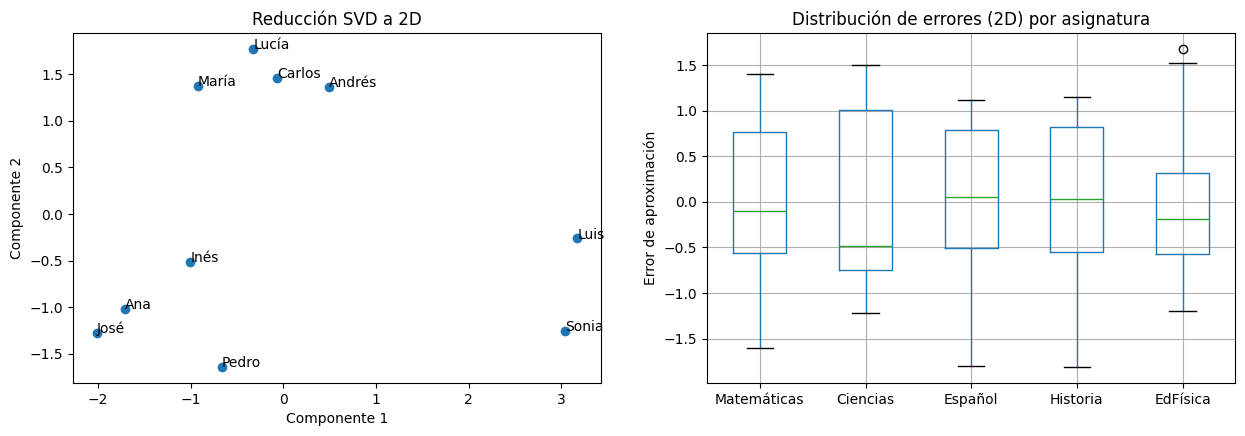

In [43]:
# Visualización 2D
plt.figure(figsize=(15, 10)) #Generamos nuestro gráfico

# Gráfico de dispersión 2D para ver la distribución de nuestros datos
plt.subplot(2, 2, 1)
plt.scatter(data_2d[:, 0], data_2d[:, 1])
for i, name in enumerate(df.index):
    plt.annotate(name, (data_2d[i, 0], data_2d[i, 1]))
plt.title('Reducción SVD a 2D')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Boxplot de errores 2D
# Calculamos el error de aproximación en un Boxplot
plt.subplot(2, 2, 2)
dfError2.boxplot()
Error2 = (scaled_data - error_2d)
dfError2 = pd.DataFrame(Error2, columns = ["Matemáticas",  "Ciencias",	"Español",	"Historia",	"EdFísica"])
plt.title('Distribución de errores (2D) por asignatura')
plt.ylabel('Error de aproximación')


Text(0, 0.5, 'Error de aproximación')

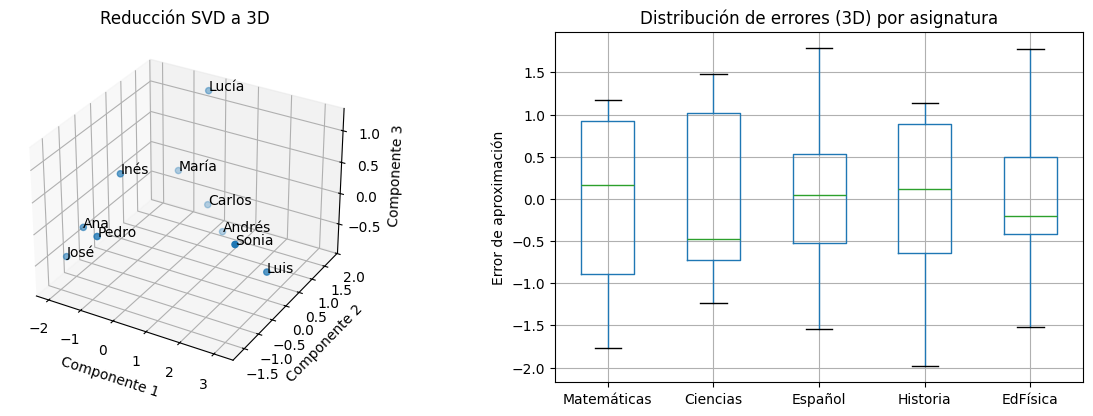

In [51]:
#ahora lo hacemos en 3D
# Visualización 3D
fig = plt.figure(figsize=(15, 10))

# Gráfico de dispersión 3D
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2])
for i, name in enumerate(df.index):
    ax.text(data_3d[i, 0], data_3d[i, 1], data_3d[i, 2], name)
ax.set_title('Reducción SVD a 3D')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

# Boxplot de errores 3D
# Calculamos el error de aproximación en un Boxplot
plt.subplot(2, 2, 4)
Error3 = (scaled_data - error_3d)
dfError3 = pd.DataFrame(Error3, columns = ["Matemáticas",  "Ciencias",	"Español",	"Historia",	"EdFísica"])
dfError3.boxplot()
plt.title('Distribución de errores (3D) por asignatura')
plt.ylabel('Error de aproximación')

In [59]:
# Calculamos los errores medios por columna
error_2d.mean(axis=0)
error_3d.mean(axis=0)
#Pedimos que nos lo imprima agregando etiquetas y formato
print("\nError medio por asignatura (2D):")
for subject, error in zip(df.columns, error_mean_2d):
    print(f"{subject}: {error:.4f}")

print("\nError medio por asignatura (3D):")
for subject, error in zip(df.columns, error_mean_3d):
    print(f"{subject}: {error:.4f}")



Error medio por asignatura (2D):
Matemáticas: 0.2319
Ciencias: 0.1739
Español: 0.2842
Historia: 0.2314
EdFísica: 0.2985

Error medio por asignatura (3D):
Matemáticas: 0.0853
Ciencias: 0.1699
Español: 0.0377
Historia: 0.1215
EdFísica: 0.1384


In [62]:
#Completando como algo extra hacemos una comparación de errores totales
total_error_2d = np.mean(np.abs(error_2d))
total_error_3d = np.mean(np.abs(error_3d))
#Pedimos que nos lo imprima
print(f"\nError total medio (2D): {total_error_2d:.4f}")
print(f"Error total medio (3D): {total_error_3d:.4f}")

# Imprimimos una pequeña observación apoyandonos de los valores obtenidos con la función sí
if total_error_2d < total_error_3d:
    print("\nLa reducción a 2D tiene menor error que la de 3D (lo cual es inusual)")
else:
    print("\nLa reducción a 3D tiene menor error que la de 2D, como era de esperar")



Error total medio (2D): 0.2440
Error total medio (3D): 0.1106

La reducción a 3D tiene menor error que la de 2D, como era de esperar


## Análisis

**Análisis de agrupamiento:**

En las visualizaciones 2D y 3D, podemos observar cómo los estudiantes se agrupan:
- Los estudiantes con mejores notas en Ciencias (Pedro, Inés, Ana, José) aparecen agrupados
- Los estudiantes con notas más balanceadas (Lucía, Andrés, Carlos, María) forman otro grupo
- Los estudiantes con notas más bajas o perfiles atípicos (Luis, Sonia) aparecen separados

**Conclusión:** La reducción a 3D proporciona una representación más clara y con menor error, pero la reducción a 2D puede ser suficiente para identificar los grupos principales.

¿Difieren sus resultados de aquellos obtenidos previamente mediante el análisis de componentes principales?

Para ello mostramos la imagen resultado de nuestro método anterior
### Reducción de dimensiones con PCA
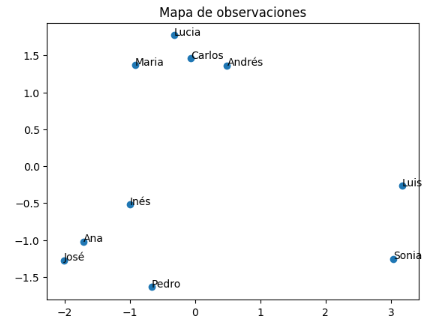

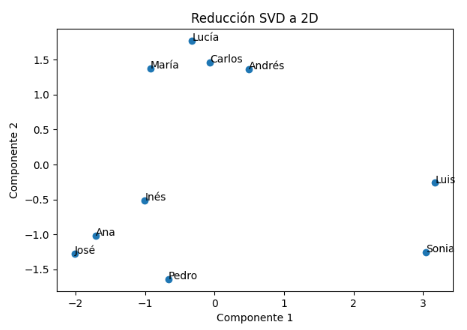

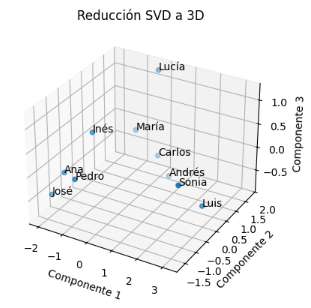

Como podemos observar el resultado obtenido con la Reducción de dimensiones con PCA y con reducción SVD en 2 dimenciones es practicamente igual, la ventaja que nos da la reducción SVD a 3 dimenciones es que por los tonos de colores podemos agrupar visualmente de manera más sencilla, aunque para el caso de las calificaciones, esta muy claro el agrupamiento de los estudientes y sus relaciones
